# Importing required libraries

In [1]:
#for managing dataframe and numerical arrays
import pandas as pd
import numpy as np

#for visualising the data
import matplotlib.pyplot as plot
import seaborn as sn

#for splitting the dataset
from sklearn.model_selection import train_test_split

#for scaling the data and reducing skewness
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 

#Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Evaluation of Model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import itertools
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek
import time

#Parallelising frameworks
import joblib
import dask

#to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
fd = pd.read_csv('C:\Tharun\Machine learning\creditcard.csv\creditcard.csv')
fd.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Data Analysis

In [3]:
#information about dataset
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
fd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Checking number of rows and columns in dataset
fd.shape

(284807, 31)

In [6]:
#Checking null values
fd.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#Number of 0 and 1 target values present
class_values = fd["Class"].value_counts()
class_values

Class
0    284315
1       492
Name: count, dtype: int64

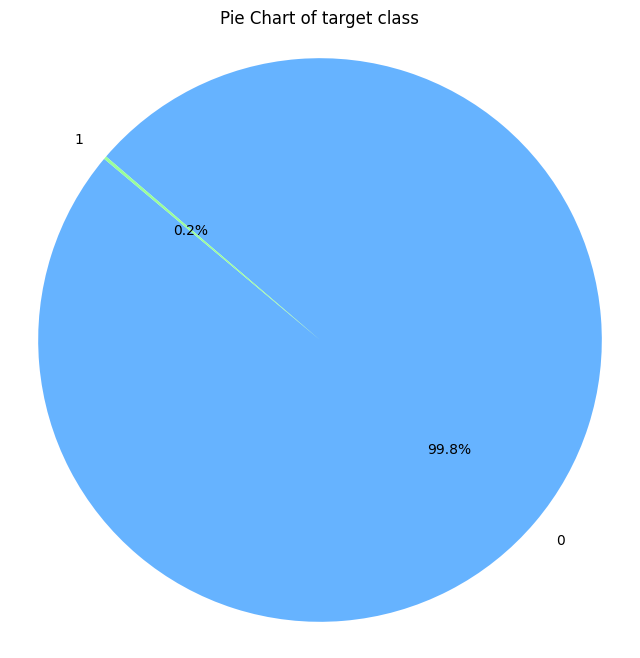

In [8]:
# Data
labels = class_values.index
sizes = class_values.values 

# Create a pie chart
plot.figure(figsize=(8, 8))
plot.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plot.axis('equal')
plot.title('Pie Chart of target class')
plot.show()


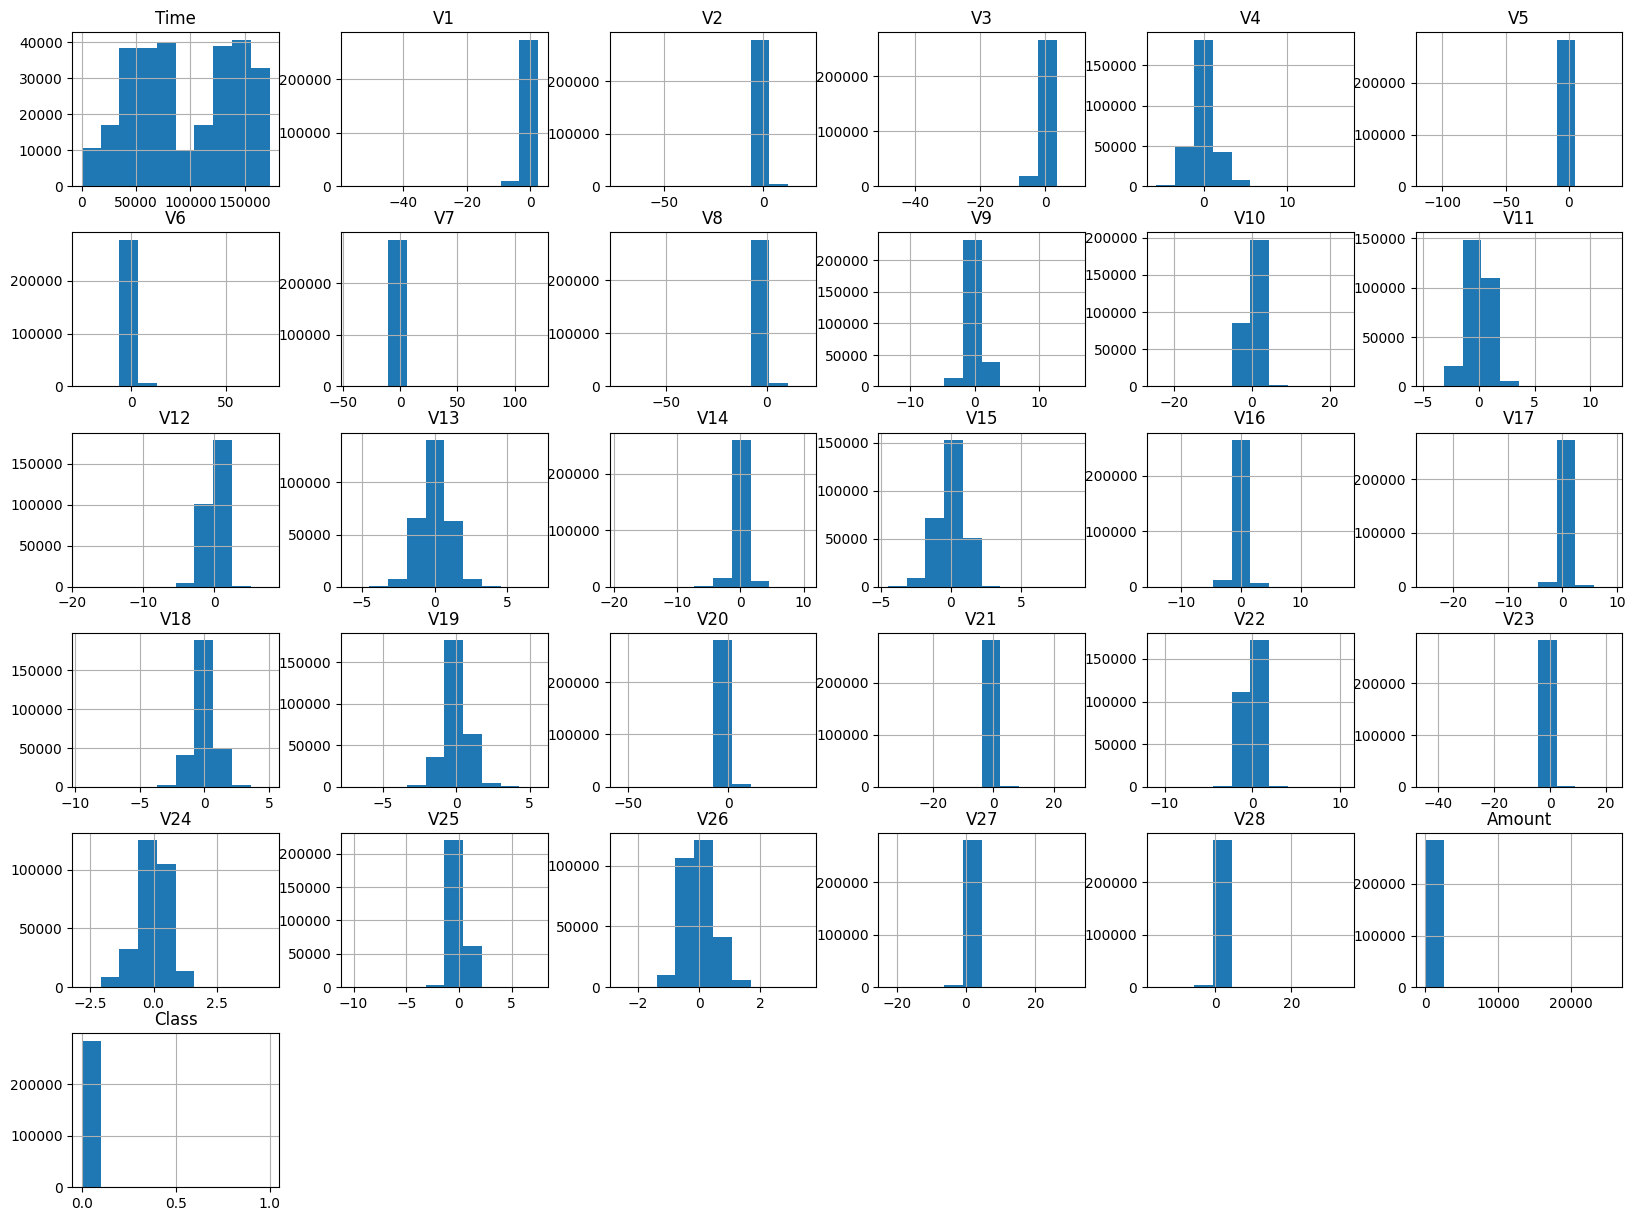

In [9]:
#Visualizing histogram of all columns to understand distribution of data
fd.hist(bins=10, figsize=(20,15))
plot.show()

In [10]:
#Checking relation between Target and input features
correlation_matrix = fd.corr(numeric_only=True)
correlation_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

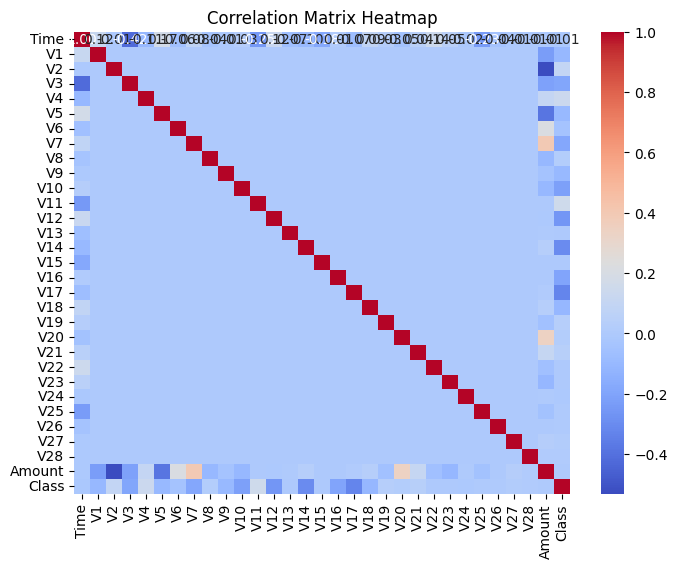

In [11]:
#plotting heatmap of correlation matrix
plot.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plot.title('Correlation Matrix Heatmap')

#Show plot
plot.show()

# Data cleaning

In [12]:
#Checking duplicates
fd.duplicated().sum()

1081

In [13]:
#Dropping duplicates
fd1 = fd.drop_duplicates()
fd1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
#Seperating input and target features
y = fd1["Class"].values
x = fd1.drop("Class",axis=1)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
#Checking skewness
x.skew()

Time      -0.035581
V1        -3.273271
V2        -4.695162
V3        -2.151984
V4         0.671504
V5        -2.414079
V6         1.829880
V7         2.890271
V8        -8.310970
V9         0.537663
V10        1.252967
V11        0.344074
V12       -2.199008
V13        0.064293
V14       -1.918804
V15       -0.309659
V16       -1.051161
V17       -3.690497
V18       -0.248661
V19        0.108312
V20       -2.043121
V21        2.820033
V22       -0.182330
V23       -5.867221
V24       -0.552129
V25       -0.415744
V26        0.580292
V27       -0.753804
V28       11.555115
Amount    16.978803
dtype: float64

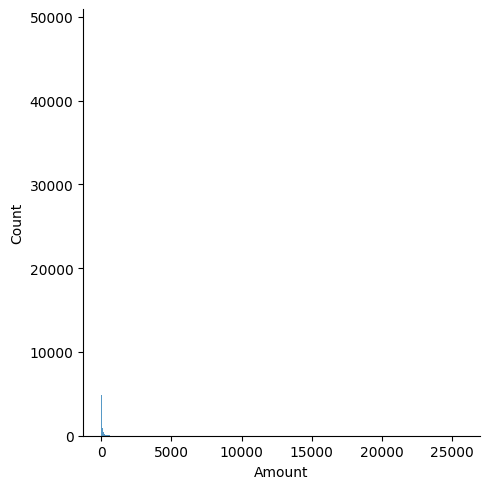

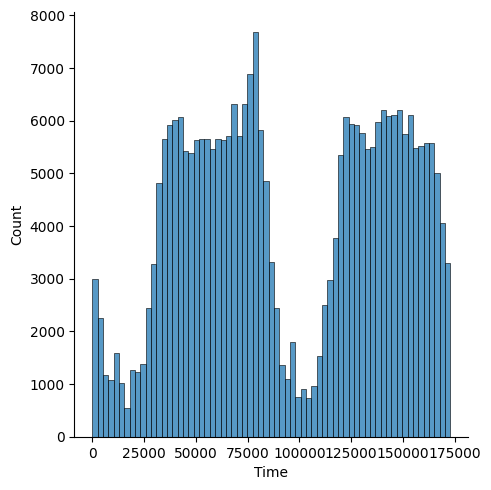

In [16]:
sn.displot(x["Amount"])
sn.displot(x["Time"])
plot.show()

In [17]:
#Reducing skewness using powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True) 
transformed_data = pt.fit_transform(x)
x = pd.DataFrame(transformed_data, columns=x.columns)
x.skew()

Time     -0.229517
V1       -0.218575
V2        0.335603
V3       -0.078673
V4        0.018864
V5       -1.220150
V6       -1.942118
V7        2.434526
V8        2.360907
V9       -0.043500
V10      -1.244980
V11       0.059474
V12       0.156863
V13       0.006184
V14       0.100310
V15       0.013195
V16       0.135621
V17      -0.827070
V18      -0.058512
V19       0.015099
V20      -0.933071
V21      -1.955268
V22      -0.020014
V23      -0.270709
V24       0.112562
V25       0.077728
V26      -0.024237
V27       3.059457
V28       0.909668
Amount    0.018234
dtype: float64

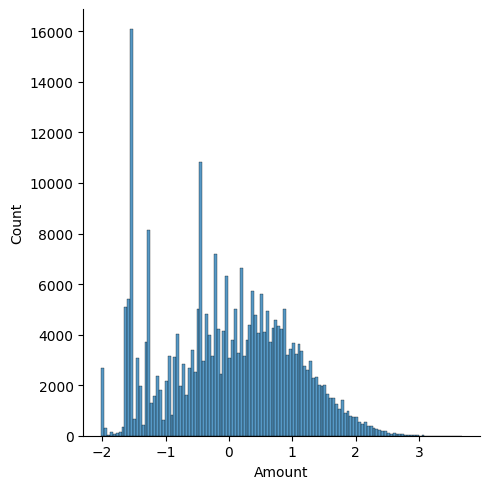

In [18]:
sn.displot(x["Amount"])

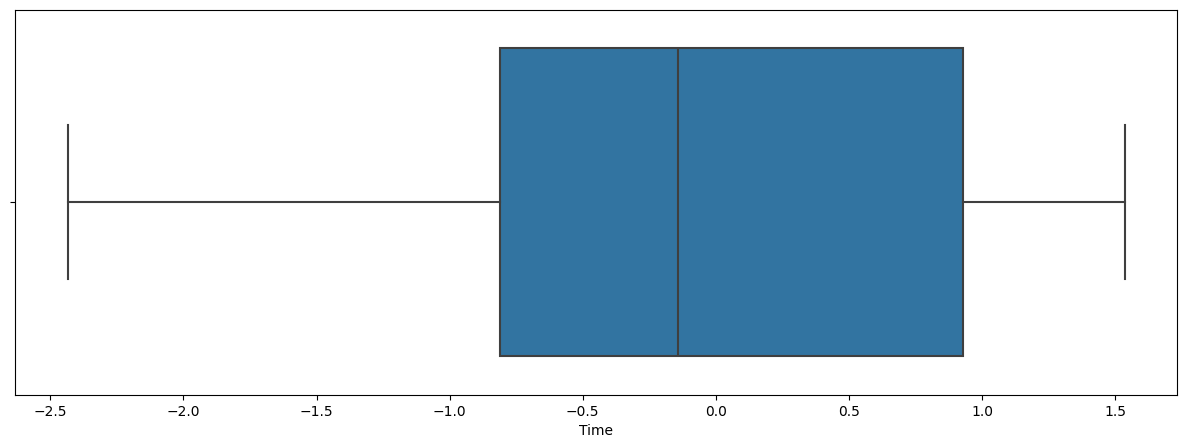

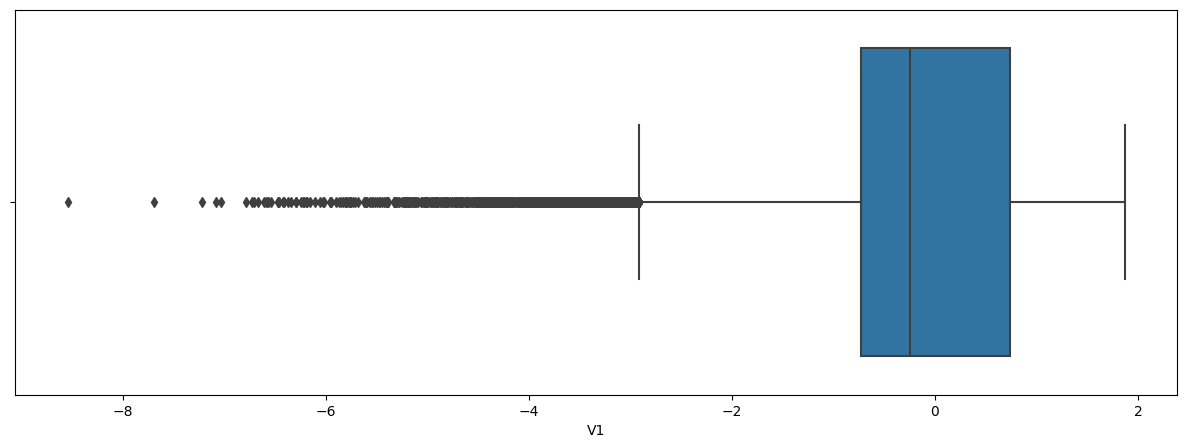

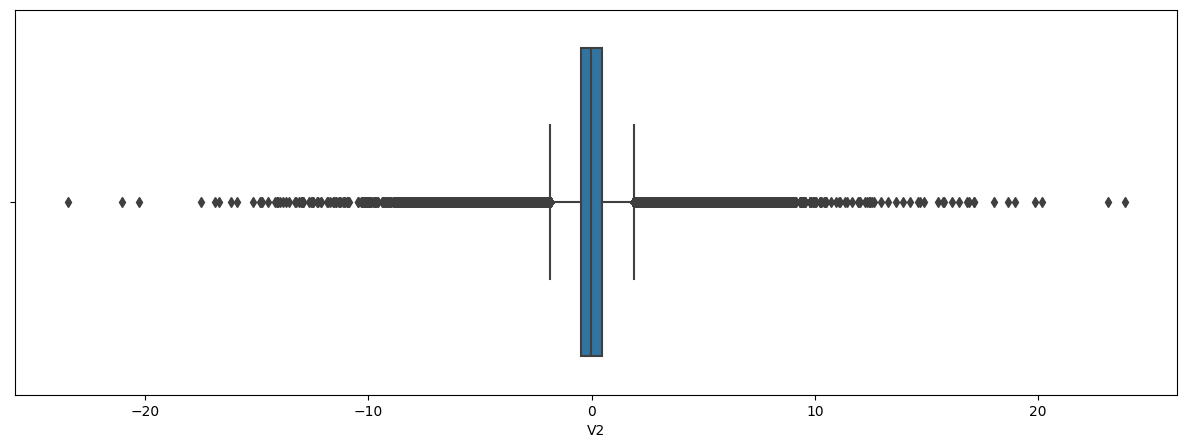

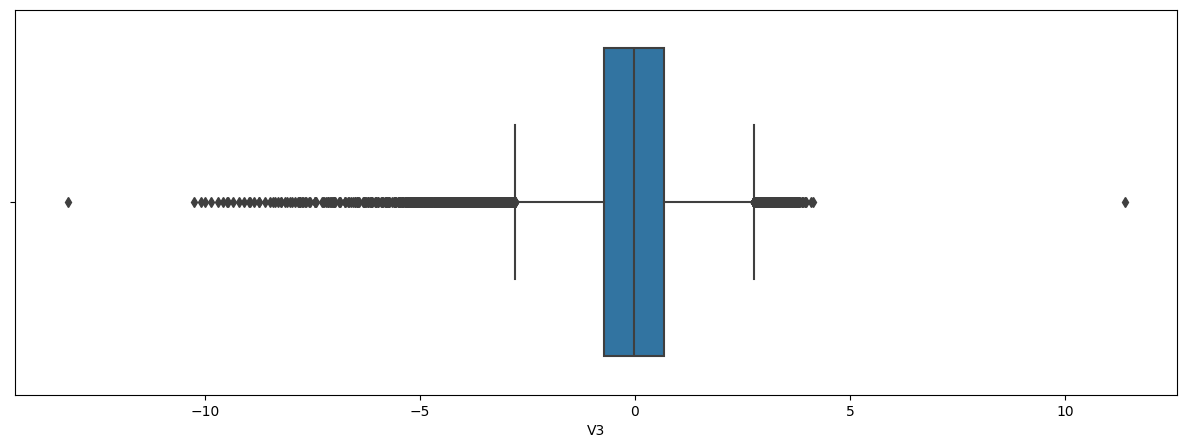

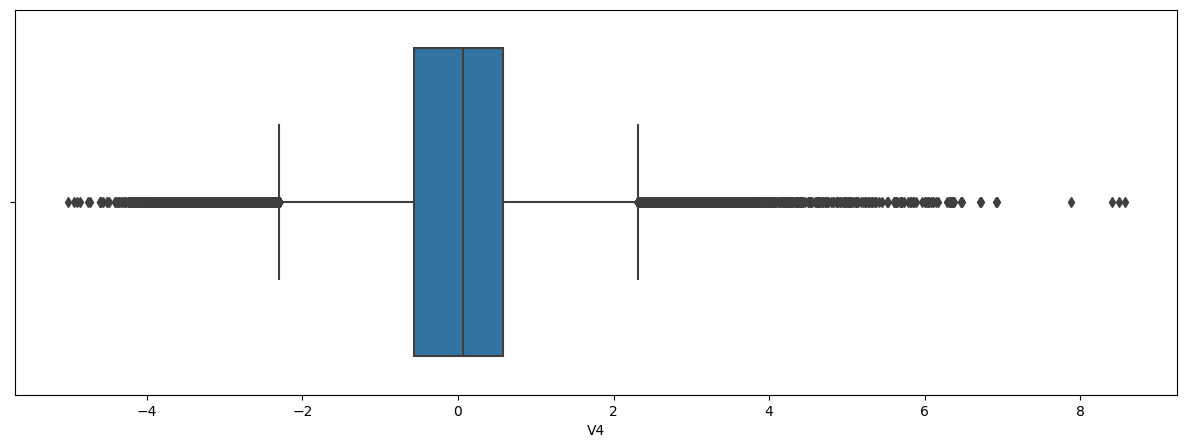

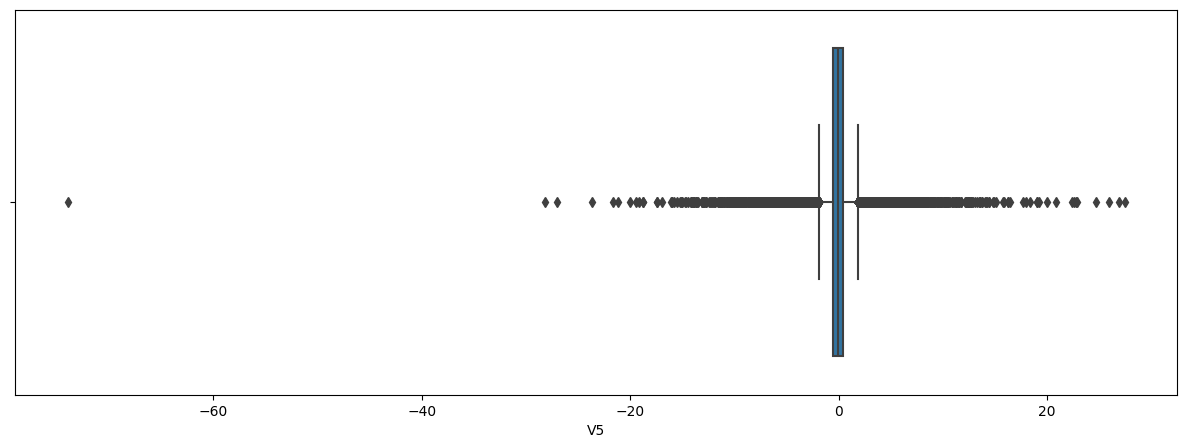

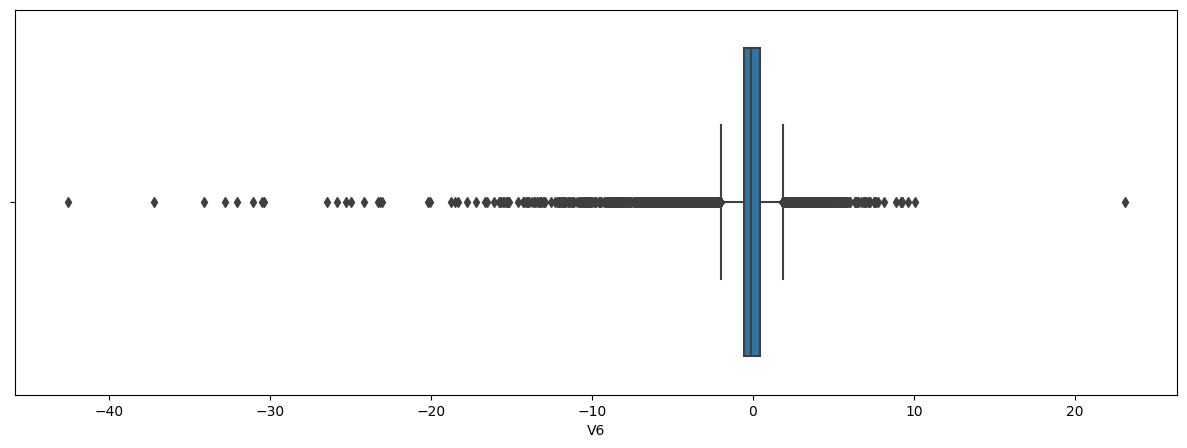

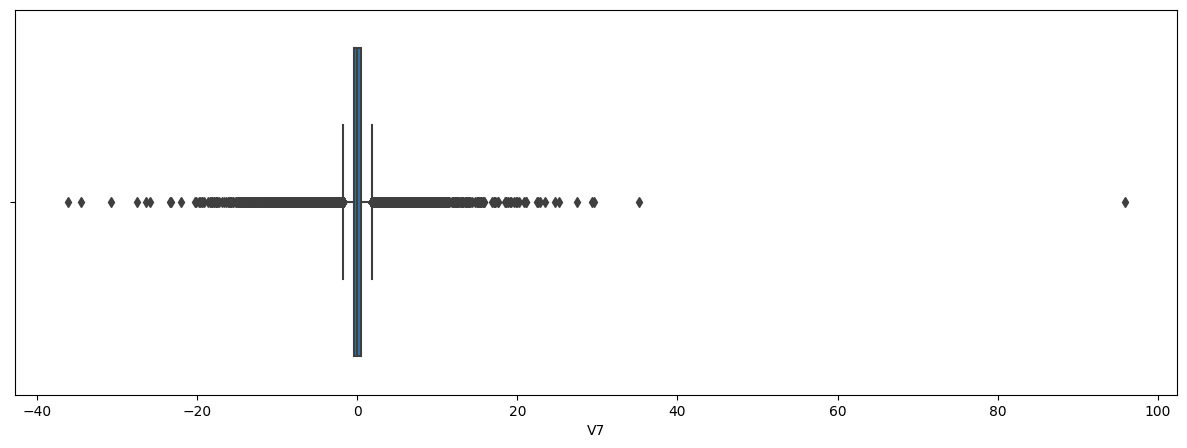

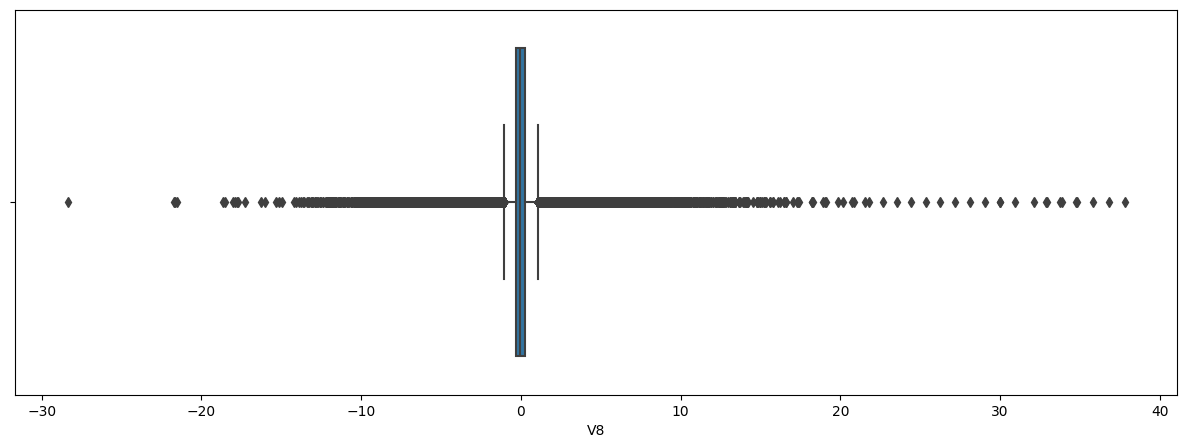

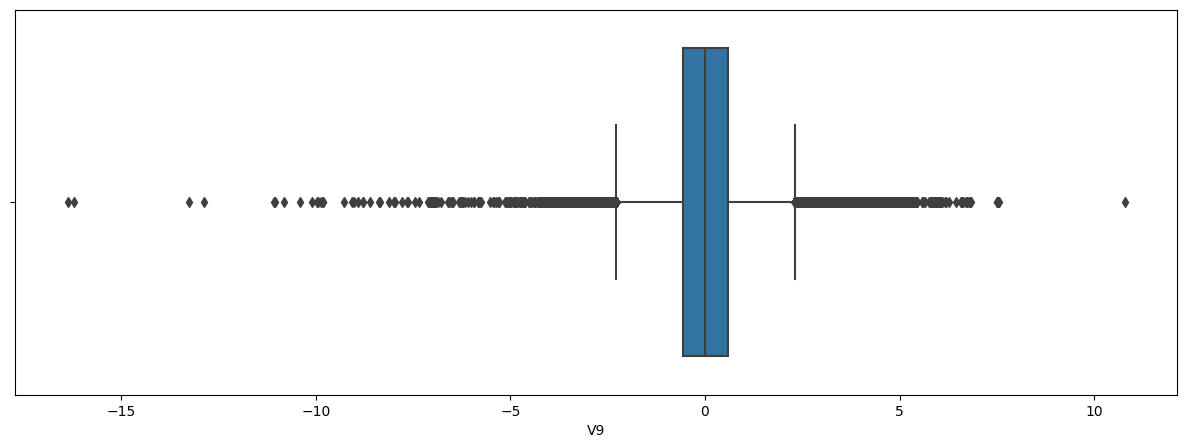

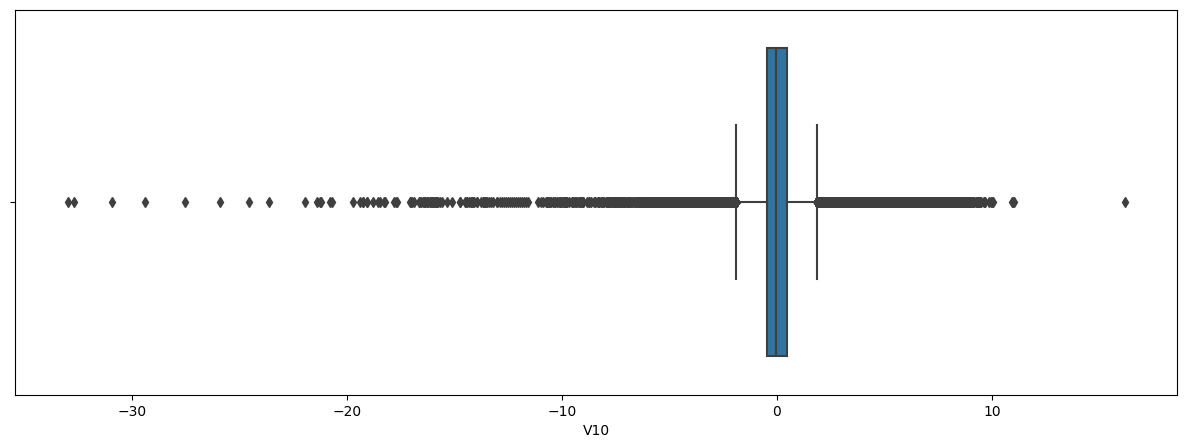

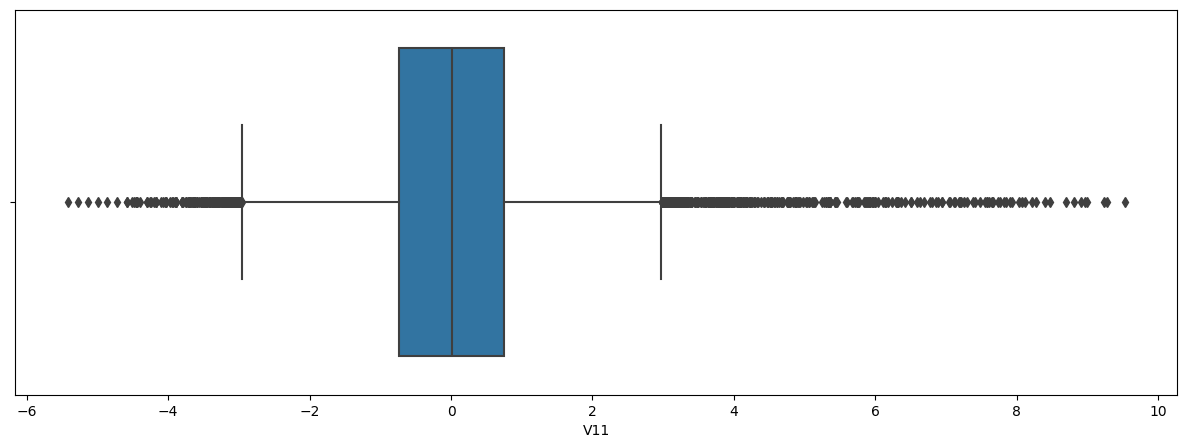

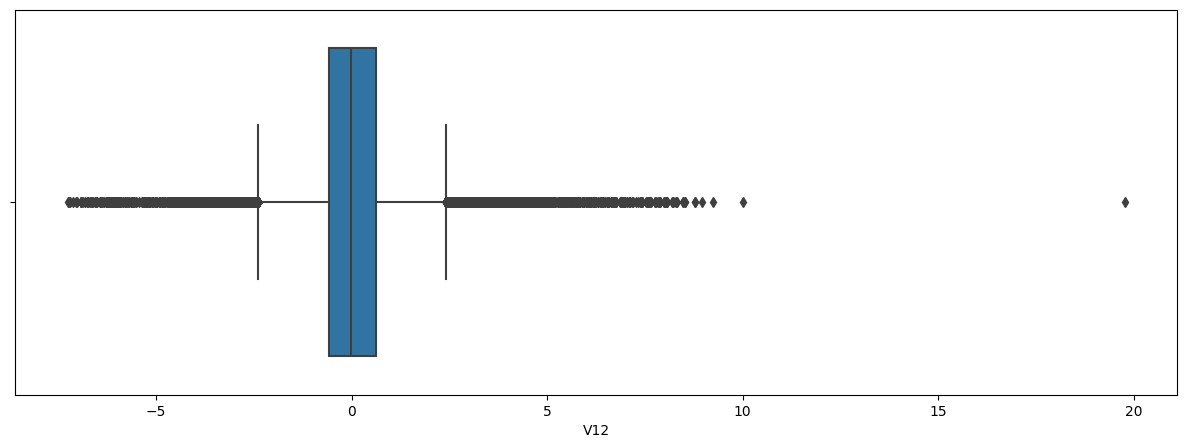

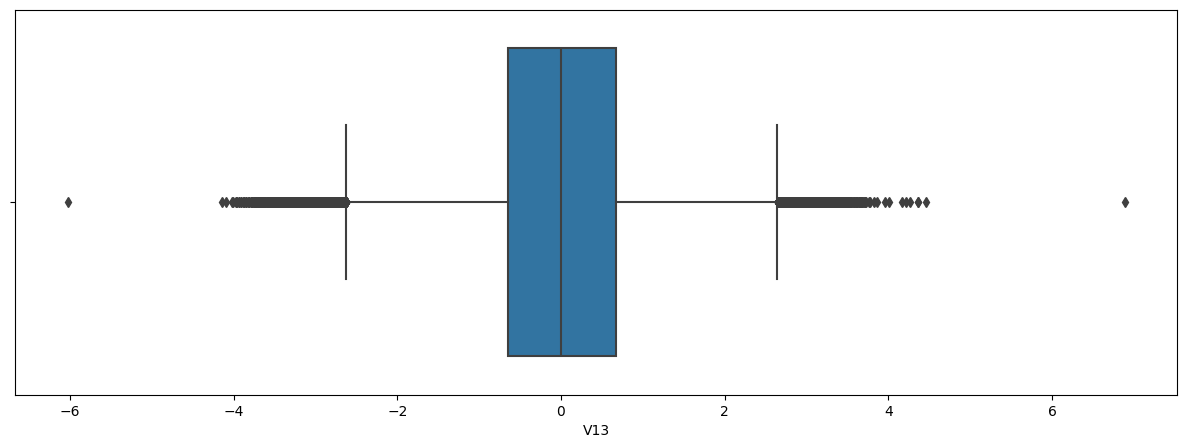

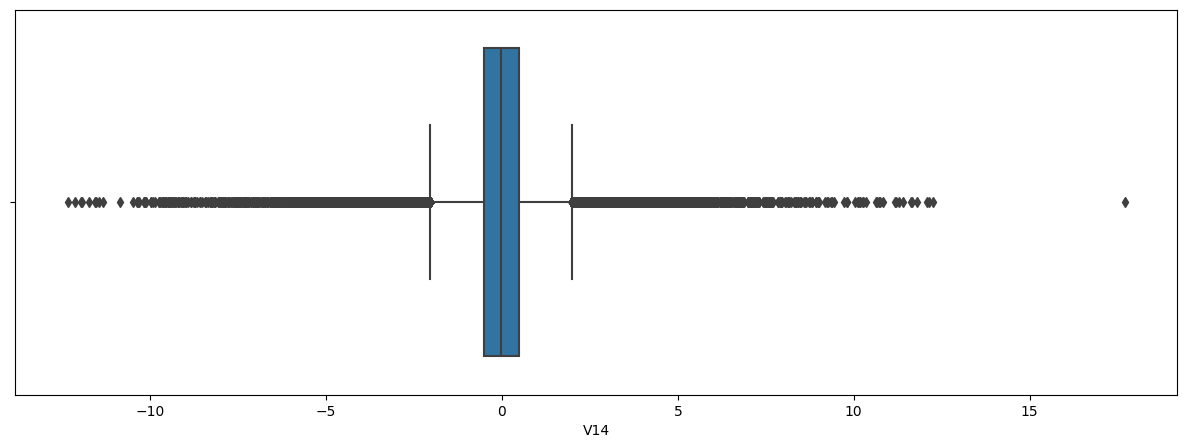

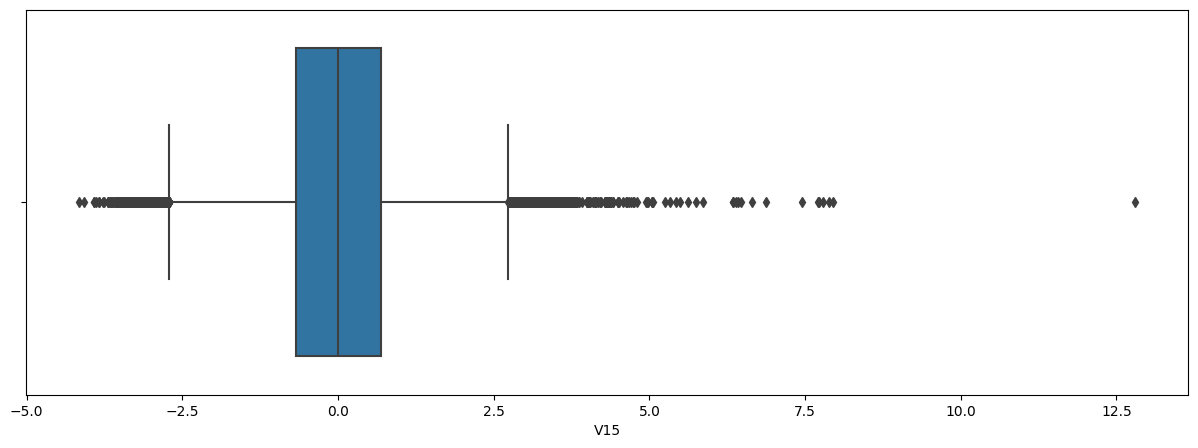

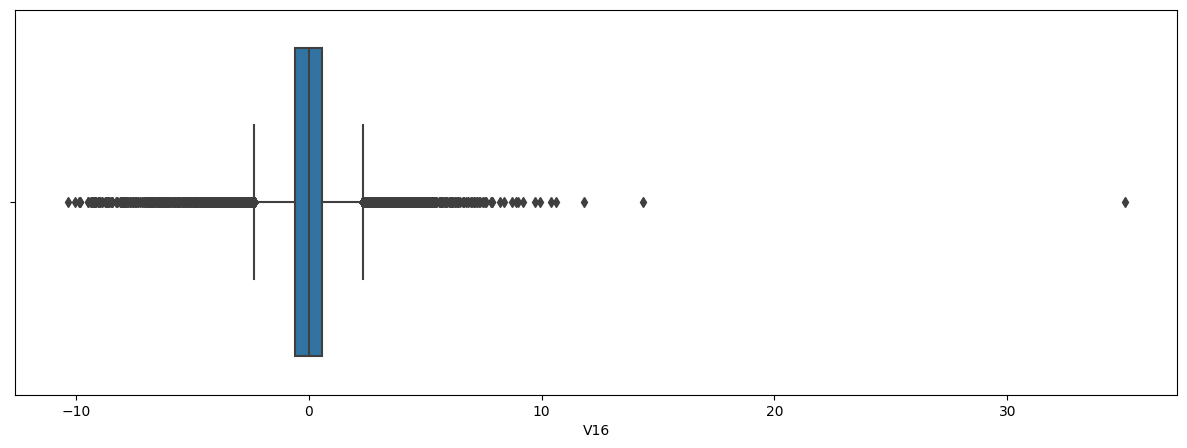

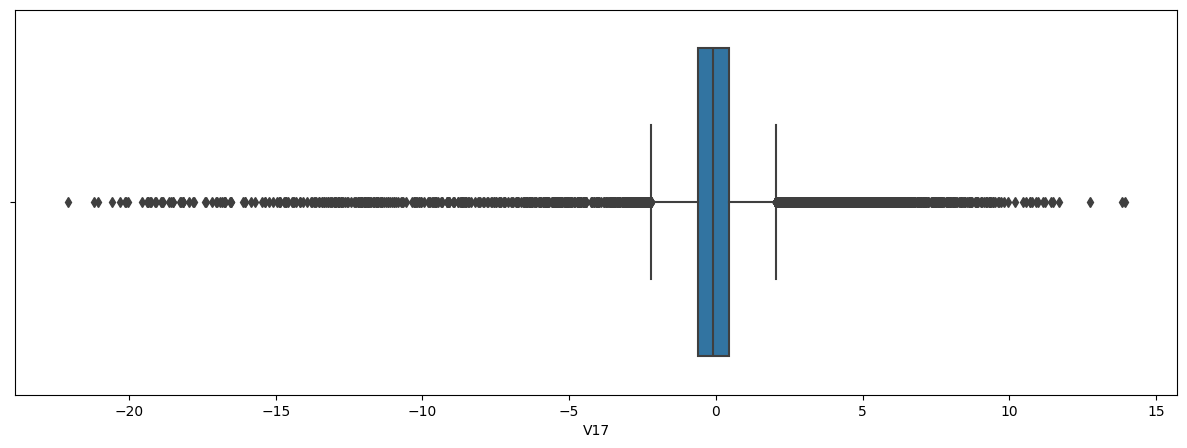

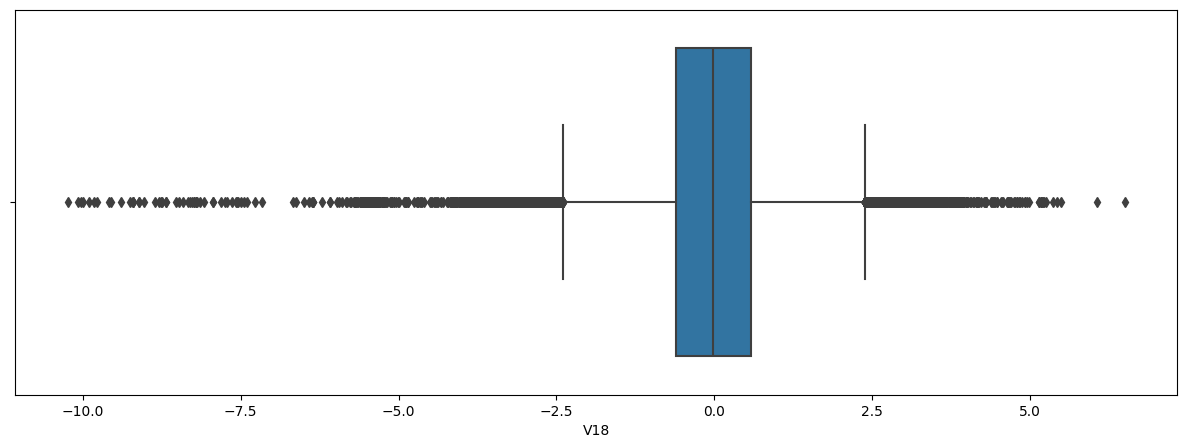

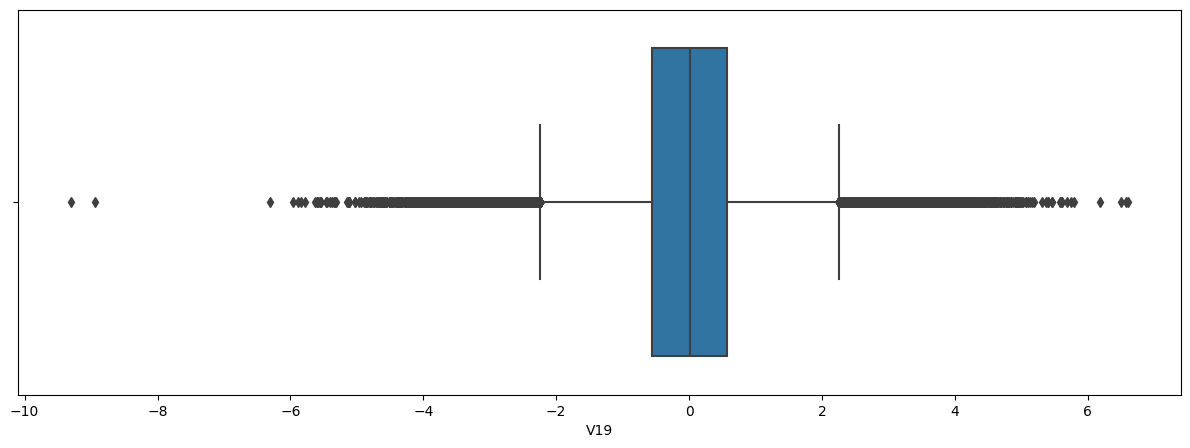

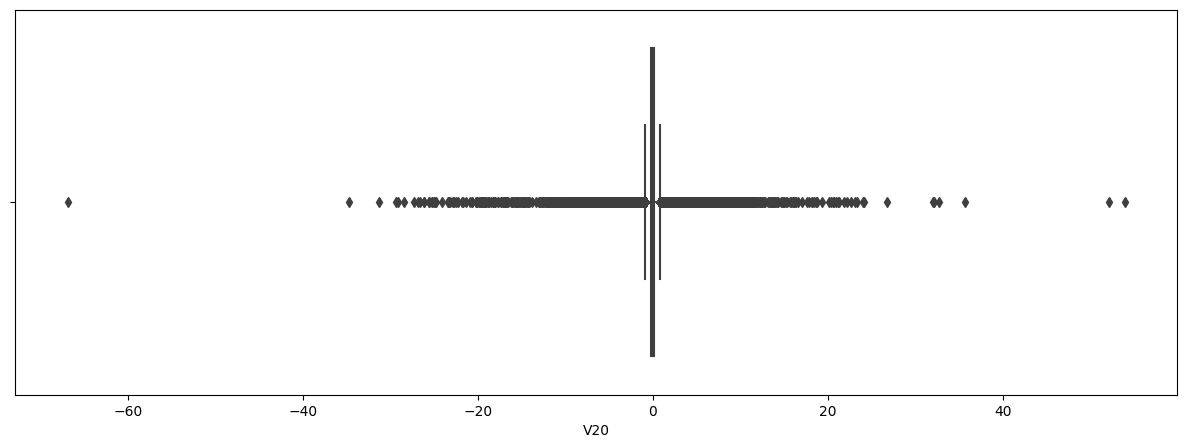

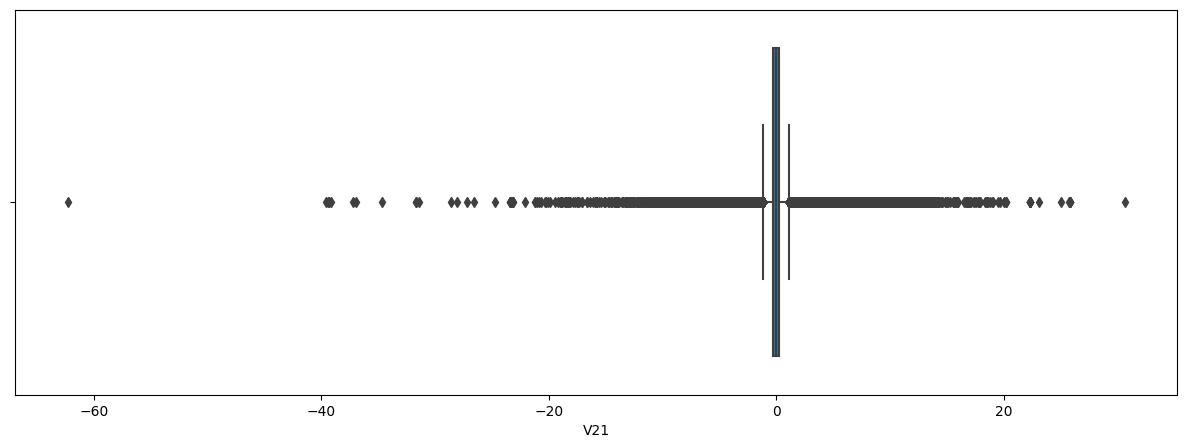

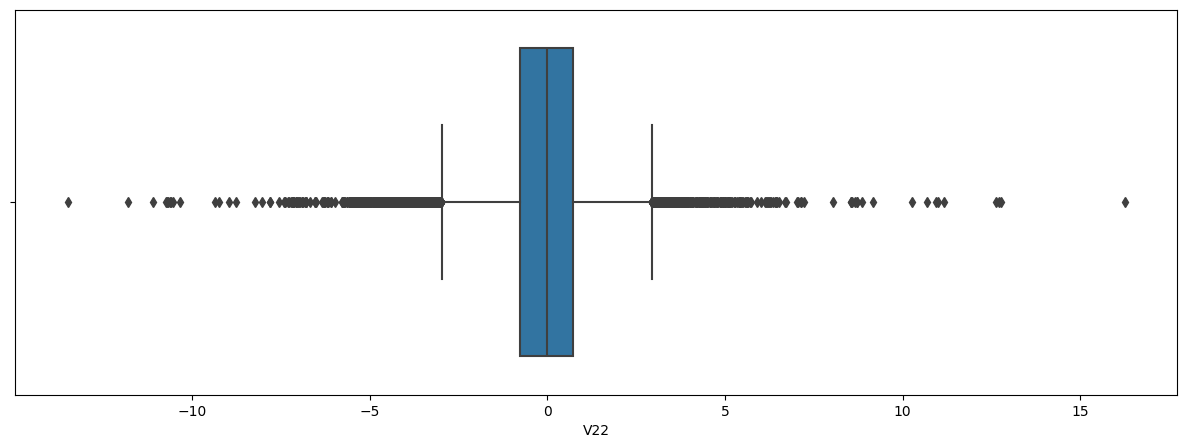

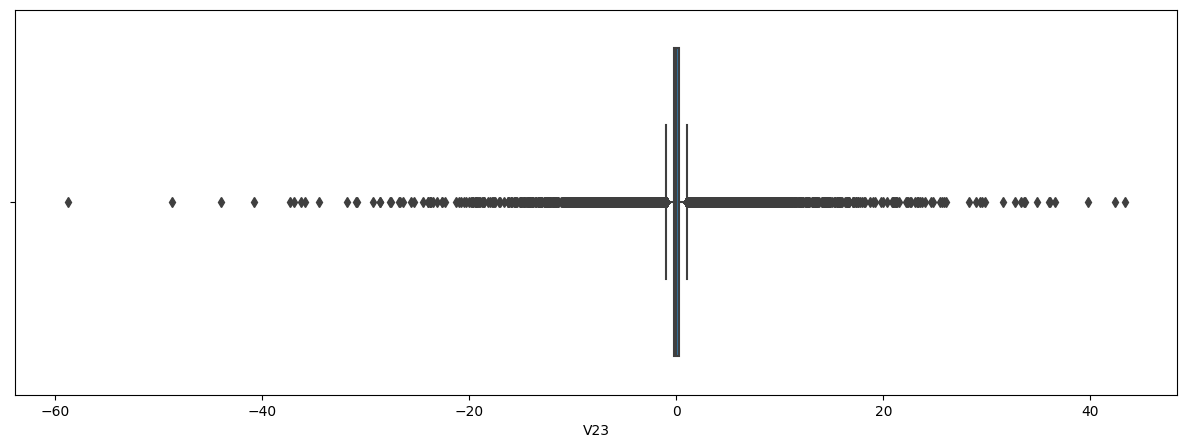

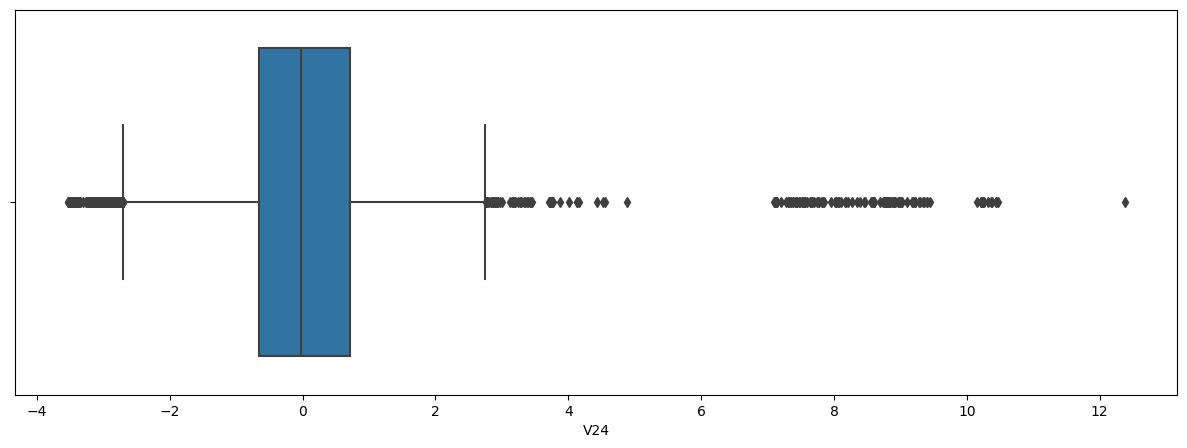

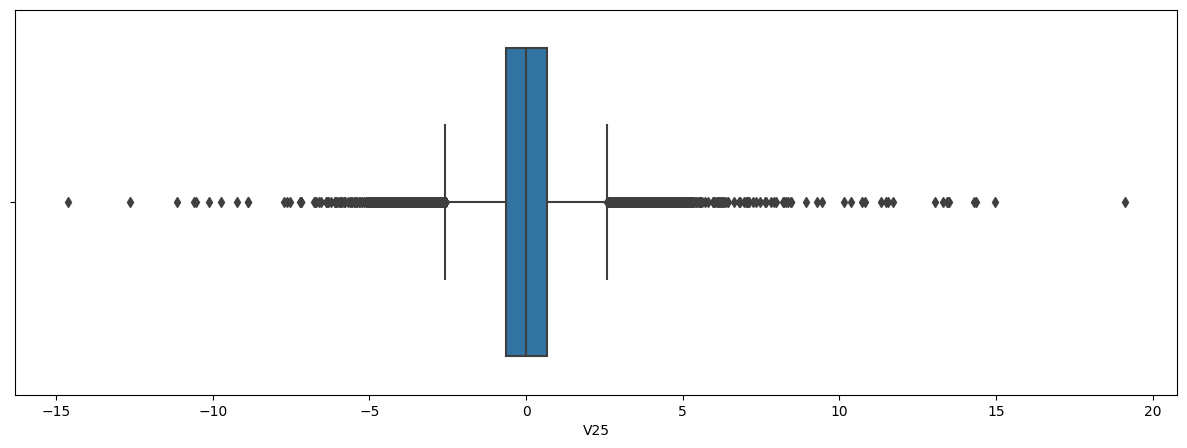

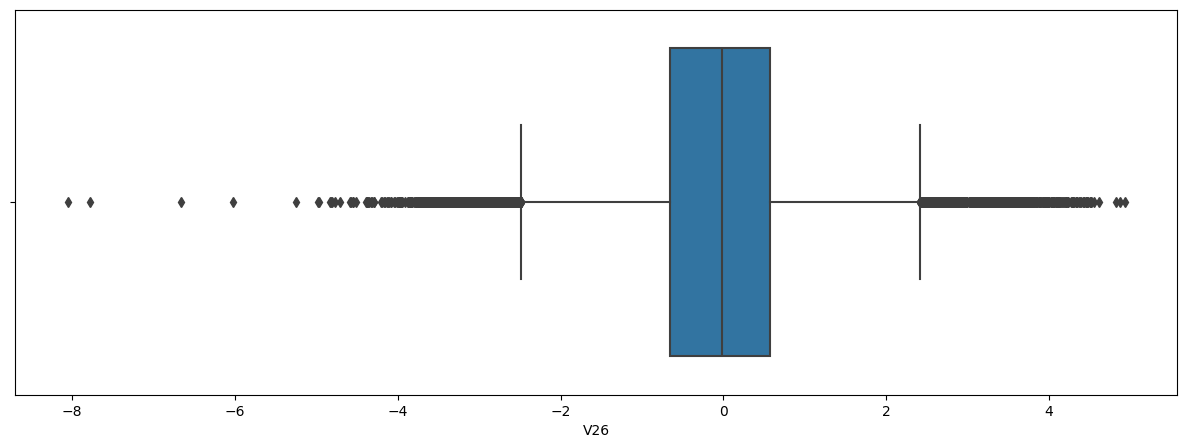

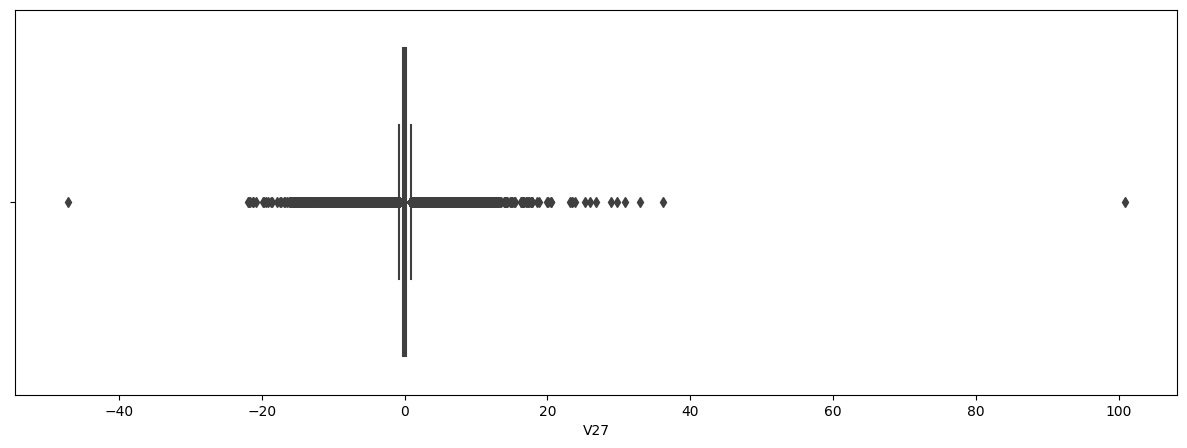

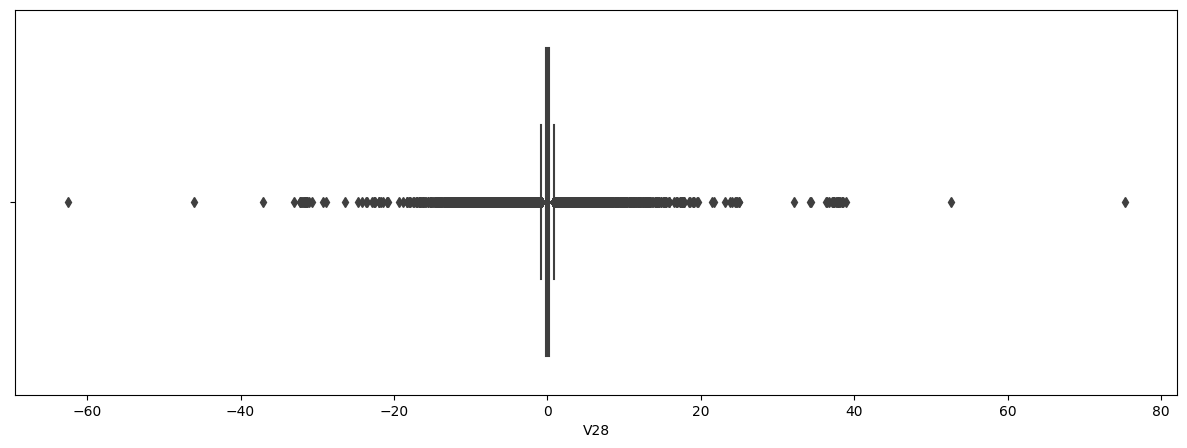

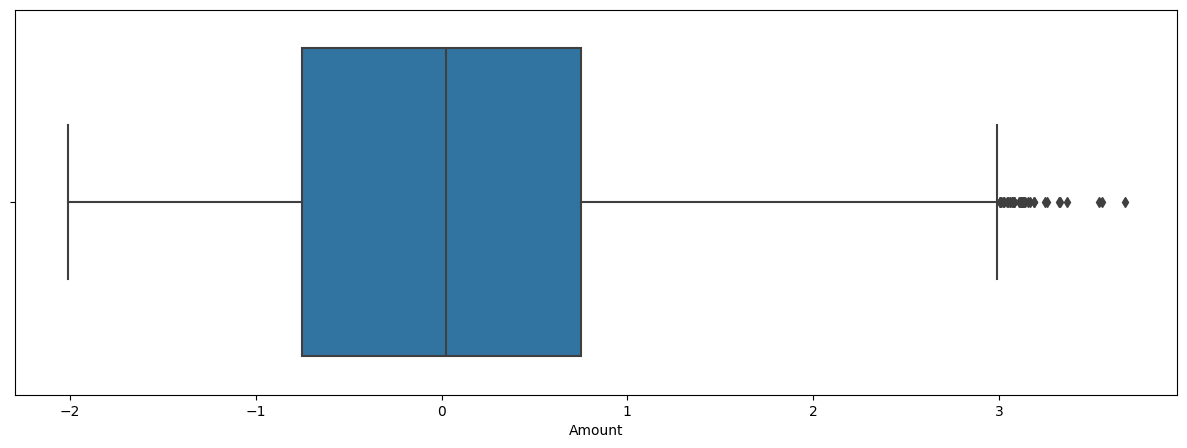

In [19]:
for i in x:
    plot.figure(figsize=(15,5))
    sn.boxplot(x=i, data =x)
    plot.show()

In [20]:
#Splitting the Dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
#Scaling of the input features in train dataset
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)

# Implementation of DASK clusters

In [22]:
#Creating clusters for parallezing the tasks using DASK library
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=10, memory_limit='3GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.1.54:8787/status,
Dashboard: http://192.168.1.54:8787/status,Workers: 10
Total threads: 40,Total memory: 27.94 GiB
Status: running,Using processes: False
Comm: inproc://192.168.1.54/7884/1,Workers: 10
Dashboard: http://192.168.1.54:8787/status,Total threads: 40
Started: Just now,Total memory: 27.94 GiB
Comm: inproc://192.168.1.54/7884/4,Total threads: 4
Dashboard: http://192.168.1.54:51273/status,Memory: 2.79 GiB
Nanny: None,


# Random Forest

In [24]:
start_time= time.time()

#Training of the model
RF = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)

#Prediction of the model
y_pred = RF.predict(X_test)

#Evaluating the performance of the model
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

#Training + Prediction time
print("time taken:",time.time()- start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.67      0.79        90

    accuracy                           1.00     56746
   macro avg       0.98      0.83      0.89     56746
weighted avg       1.00      1.00      1.00     56746

[[56654     2]
 [   30    60]]
time taken: 19.734591484069824


# Parallelizing Random Forest

In [36]:
start_time= time.time()

#Parallelizing the training and prediction of the model
with joblib.parallel_backend('dask'):
    #Training the model
    RF_parallel = RandomForestClassifier(n_estimators=5).fit(X_train,y_train)
    #prediction of the model
    y_pred = RF_parallel.predict(X_test)

#Evaluating the performance of model
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
RF_accuracy = accuracy_score(y_test,y_pred)
RF_f1score = f1_score(y_test,y_pred)
print("f1 score of Random Forest:",RF_f1score)

#Training + prediction time
RF_time= time.time()- start_time
print("time taken:",RF_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.70      0.82        90

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746

[[56655     1]
 [   27    63]]
f1 score of Random Forest: 0.8181818181818181
time taken: 5.830913305282593


# K Nearest Neighbors

In [26]:
start_time= time.time()

#Training the model
KNN = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)

#Prediction of the model
y_pred = KNN.predict(X_test)

#Evaluating the performance of model
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

#Time taken for training and predicting
print("time taken:",time.time()- start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.94      0.67      0.78        90

    accuracy                           1.00     56746
   macro avg       0.97      0.83      0.89     56746
weighted avg       1.00      1.00      1.00     56746

[[56652     4]
 [   30    60]]
time taken: 22.46772289276123


# Parallelizing K Nearest Neighbors

In [33]:
start_time= time.time()

#Parallelizing the training and prediction process
with joblib.parallel_backend('dask'):
    #training the model
    KNN_Parallel = KNeighborsClassifier(n_neighbors=15).fit(X_train,y_train)
    #Testing the model
    y_pred = KNN_Parallel.predict(X_test)

#Evaluating the performance of model
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
KNN_accuracy = accuracy_score(y_test,y_pred)
KNN_f1score = f1_score(y_test,y_pred)
print("f1 score of KNN:",KNN_f1score)

#Time taken for training and prediction
KNN_time= time.time()- start_time
print("time taken:",KNN_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.94      0.67      0.78        90

    accuracy                           1.00     56746
   macro avg       0.97      0.83      0.89     56746
weighted avg       1.00      1.00      1.00     56746

[[56652     4]
 [   30    60]]
f1 score of KNN: 0.7792207792207793
time taken: 21.412259101867676


# Support Vector Machine

In [28]:
start_time= time.time()

#Training the model
SVM = svm.SVC(kernel = 'linear')
Support_Vector = SVM.fit(X_train,y_train)

#Testing the model
y_pred = Support_Vector.predict(X_test)

#Evaluating the performance of model
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

#Time taken for training and prediction 
print("time taken:",time.time() - start_time)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.88      0.74      0.81        90

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746

[[56647     9]
 [   23    67]]
time taken: 127.54922032356262


# Parallelizing Support Vector Machine

In [34]:
from sklearn import svm
start_time= time.time()

#Parallelizing the training and testing process
with joblib.parallel_backend('dask'):
    #Training the model
    SVM_Parallel = SVM.fit(X_train,y_train)
    #Testing the model
y_pred = SVM_Parallel.predict(X_test)

#Evaluating the performance of model
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
SVM_accuracy = accuracy_score(y_test,y_pred)
SVM_f1score = f1_score(y_test,y_pred)
print("f1 score of SVM:",SVM_f1score)

#Time taken for training and prediction 
SVM_time = time.time() - start_time
print("time taken:",SVM_time)
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.88      0.74      0.81        90

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746

[[56647     9]
 [   23    67]]
f1 score of SVM: 0.8072289156626506
time taken: 123.21942615509033


# Comparing Accuracy and F1 scores of Models after parallelization

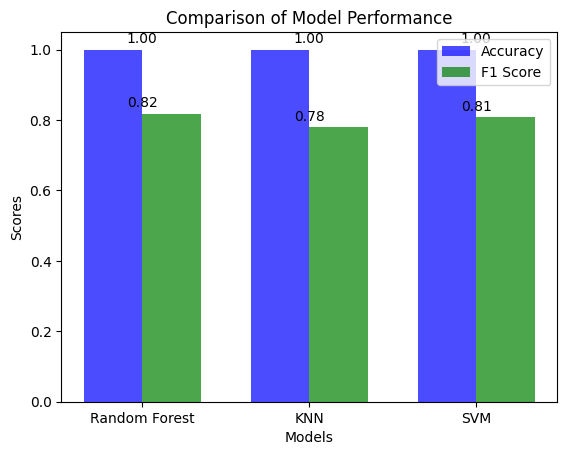

In [37]:
# Initialization
model_names = ['Random Forest', 'KNN', 'SVM']
accuracy_scores = [RF_accuracy, KNN_accuracy, SVM_accuracy]
f1_scores = [RF_f1score, KNN_f1score, SVM_f1score]

# Number of models
num_models = len(model_names)

# Setting up bar width
bar_width = 0.35
index = np.arange(num_models)

# Plotting accuracy scores
bar1 = plot.bar(index, accuracy_scores, bar_width, label='Accuracy', color='b', alpha=0.7)

# Plotting F1 scores
bar2 = plot.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color='g', alpha=0.7)

# Annotating each bar with the respective value
for bar, scores in zip([bar1, bar2], [accuracy_scores, f1_scores]):
    for i, score in enumerate(scores):
        plot.text(i + bar_width / 2, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

# Plotting the final bar graph
plot.xlabel('Models')
plot.ylabel('Scores')
plot.title('Comparison of Model Performance')
plot.xticks(index + bar_width / 2, model_names)
plot.legend()

# Show the plot
plot.show()


# Comparing time taken for training and testing of the Models after parallelization

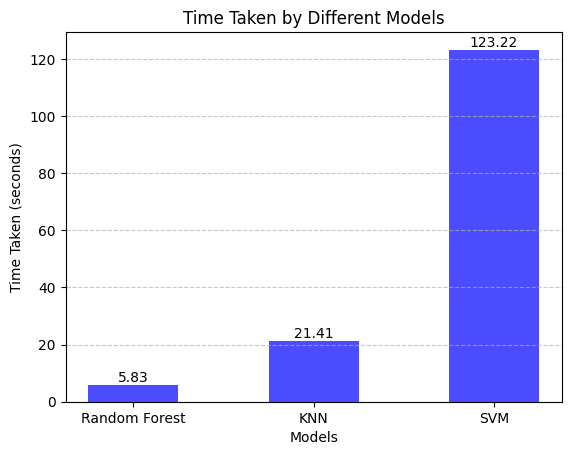

In [40]:
# Time taken by the models after parallelizing
time_taken = [RF_time, KNN_time, SVM_time]

# Setting up bar width
bar_width = 0.5
index = np.arange(num_models)

# Plotting time taken for training and testing of each model with values on each bar
fig, ax = plot.subplots()
bars = ax.bar(index, time_taken, bar_width, color='b', alpha=0.7)

# Displaying values on each bar
for bar, time in zip(bars, time_taken):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(time, 2), ha='center', va='bottom', color='black', fontsize=10)

# Plotting the final bar graph
ax.set_xlabel('Models')
ax.set_ylabel('Time Taken (seconds)')
ax.set_title('Time Taken by Different Models')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plot.show()


# Conclusion
### From all the above comparisions it can be clearly understood that Random Forest Classifier is best suitable for this application after parallelization of all models, because the time taken by Random forest is far lesser than all other models without compromising the accuracy in prediction. The time taken for training and testing of the model is drastically decreased by parallelizing the training and testing process using DASK integrated with joblib.